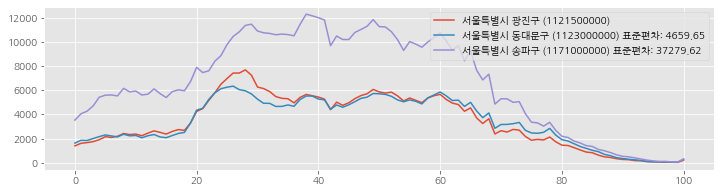

In [69]:
import csv
import matplotlib.pyplot as plt
import numpy as np

f = open('population.csv','r')
data = csv.reader(f)
next(data)
next(data)


target = [] # 광진구 0~100세 인구 데이터
target_name = "" # 광진구 이름
name = [] # 지역구 이름
ppn = [] #0~100세 인구 데이터
sd = [] #표준편차

for row in data:
    if "광진구" in row[0]:
        target = [int(i.replace(',','')) for i in row[3:]]
        target_name = row[0]
        
    else:
        name.append(row[0])
        ppn.append([int(i.replace(',','')) for i in row[3:]])

ppn_n = np.array(ppn)
target_n = np.array(target)

sd = np.array(np.sqrt(np.sum((ppn_n-target_n)**2,axis=1)))


plt.figure(figsize=(12, 3))
plt.rc('font', family='NanumGothic')
plt.style.use('ggplot')
plt.plot(target,label=target_name)
plt.plot(ppn[sd.argmin()],label = name[sd.argmin()] + " 표준편차: " + "{0:.2f}".format(sd[sd.argmin()]))
plt.plot(ppn[sd.argmax()], label = name[sd.argmax()] + " 표준편차: " + "{0:.2f}".format(sd[sd.argmax()]))

plt.legend()
